In [4]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as pilimg

img1 = pilimg.open('images/jeju_summer.jpg')
img2 = pilimg.open('images/baby1.jpg')
img3 = pilimg.open('images/baby2.jpg')

pix1 = np.array(img1)

#사진을 이어붙이기 위해 배경 이미지 크기에 맞추어 변경할 크기 계산
resize_x2  = pix1.shape[1] / 2
if pix1.shape[1] % 2 > 0 :
    resize_x1 = pix1.shape[1] / 2 + 1 
else :
    resize_x1 = pix1.shape[1] / 2
    
img2 = img2.resize((int(resize_x1), int(pix1.shape[0])))
pix2 = np.array(img2)

img3 = img3.resize((int(resize_x2), int(pix1.shape[0])))
pix3 = np.array(img3)

#가로방향 나란히 붙이기
pix4 = np.concatenate((pix2, pix3),axis = 1)

#이미지 블랜딩을 위해 각 픽셀의 RGB값을 (0~1) 의 실수범위로 정규화
pix1 = (1/255) * pix1
pix4 = (1/255) * pix4

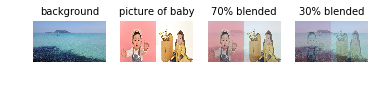

In [6]:
# 가중치 정하기
weight = 0.3

#가중치 적용을 위해 원본 이미지 행렬에 가중치를 실수배 하여 합치기
pix5 = pix1 * weight + pix4 * (1-weight)

#두 원본 이미지의 가중치를 반대로 적용한 이미지 생성하기
pix6 = pix1 *(1-weight) + pix4 * weight

#배경이미지와 타겟이미지 합성한 이미지 출력
plt.subplot(141)
plt.imshow(pix1)
plt.axis('off')
plt.title('background',fontsize = 10)

plt.subplot(142)
plt.imshow(pix4)
plt.axis('off')
plt.title('picture of baby', fontsize = 10)

plt.subplot(143)
plt.imshow(pix5)
plt.axis('off')
plt.title('70% blended', fontsize = 10)

plt.subplot(144)
plt.imshow(pix6)
plt.axis('off')
plt.title('30% blended',fontsize = 10)

pix5 = pix5 * 255
img5 = pilimg.fromarray(pix5.astype(np.uint8))
img5.save('BlendedPic_70.png')

pix6 = pix6 * 255
img6 = pilimg.fromarray(pix6.astype(np.uint8))
img6.save('BlendedPic_30.png') #파일저장

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as pilimg

img1 = pilimg.open('images/baby1.jpg')

pix1 = np.array(img1)
pix1 = (1 / 255) * pix1
pix_size1 = np.array(pix1.shape)

pix2 = np.empty(pix_size1)


for i in range(pix_size1[0]):
    for j in range(pix_size[1]):
        gray_pix = 0.2126 * pix1[i][j][0] + 0.7152 * pix1[i][j][1] + 0.0722 * pix1[i][j][2] #transform gray tone
        pix2[i,j] =(gray_pix, gray_pix, gray_pix)

plt.subplot(141)
plt.imshow(pix1)
plt.axis('off')
plt.title